In [2]:
import os
cur_dir="drive/MyDrive/Colab Notebooks/Project2"
os.chdir(cur_dir)

In [ ]:
!pip install -r requirements.txt

In [3]:
import json

from datetime import datetime
from prophet.serialize import model_to_json, model_from_json

In [4]:
with open('./models/serialized_btcmodel.json', 'r') as fin:
    btcmodel = model_from_json(json.load(fin))  # Load model

with open('./models/serialized_ethmodel.json', 'r') as fin:
    ethmodel = model_from_json(json.load(fin))  # Load model

# Predicting future month for BTC
btc_future = btcmodel.make_future_dataframe(periods=720, freq='H')
btc_forecast = btcmodel.predict(btc_future)

# Predicting future month for ETH
eth_future = ethmodel.make_future_dataframe(periods=720, freq='H')
eth_forecast = ethmodel.predict(eth_future)

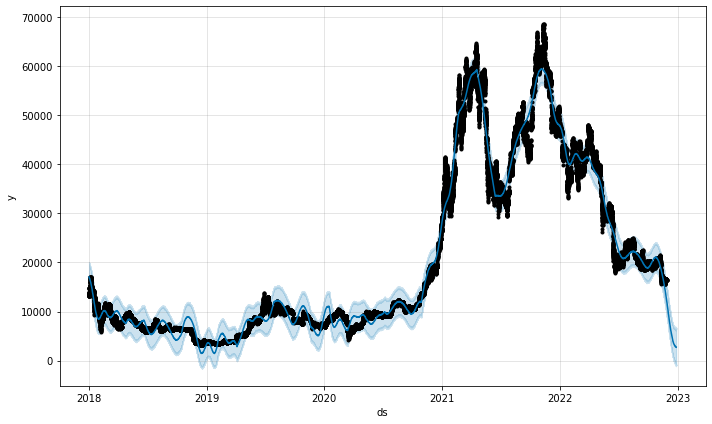

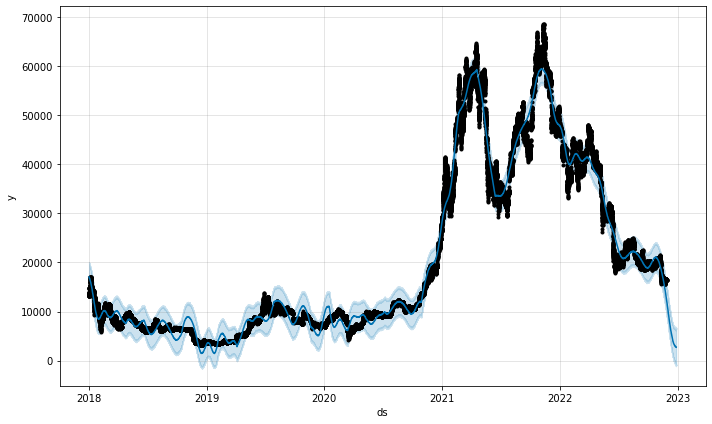

In [7]:
btcmodel.plot(btc_forecast)

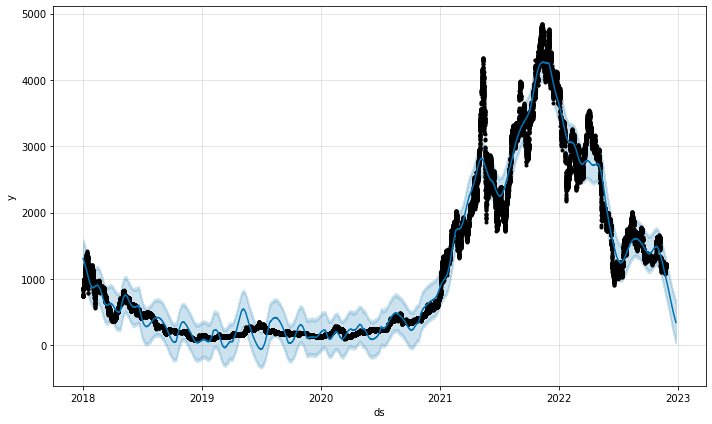

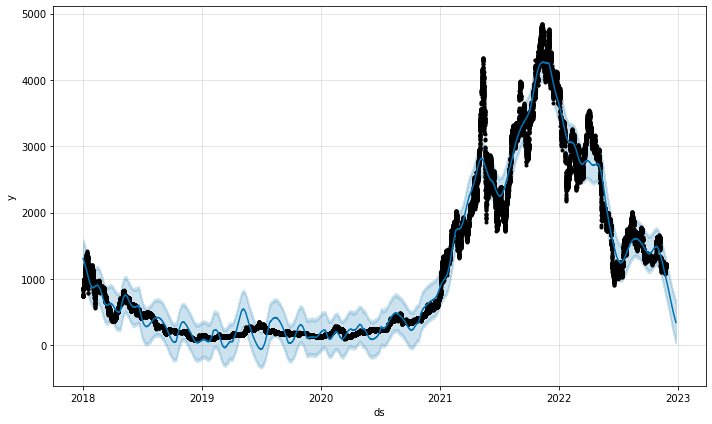

In [8]:
ethmodel.plot(eth_forecast)

In [9]:
today = datetime.today().strftime('%Y-%m-%d')

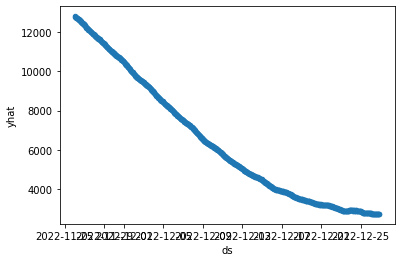

In [10]:
# Next month prediction for BTCUSD
btc_forecast[btc_forecast.ds > today].plot(x='ds', y='yhat', kind='scatter')

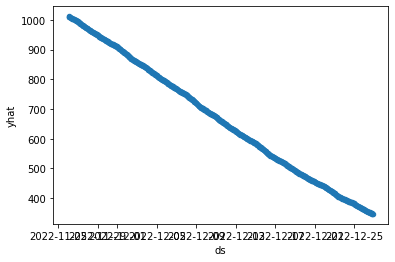

In [11]:
# Next month prediction for BTCUSD
eth_forecast[eth_forecast.ds > today].plot(x='ds', y='yhat', kind='scatter')

In [12]:
with open('./models/serialized_btcmodel_20.json', 'r') as fin:
    btcmodel_20 = model_from_json(json.load(fin))  # Load model

with open('./models/serialized_ethmodel_20.json', 'r') as fin:
    ethmodel_20 = model_from_json(json.load(fin))  # Load model

# Predicting future month for BTC
btc_future_20 = btcmodel_20.make_future_dataframe(periods=720, freq='H')
btc_forecast_20 = btcmodel_20.predict(btc_future_20)

# Predicting future month for ETH
eth_future_20 = ethmodel_20.make_future_dataframe(periods=720, freq='H')
eth_forecast_20 = ethmodel_20.predict(eth_future_20)

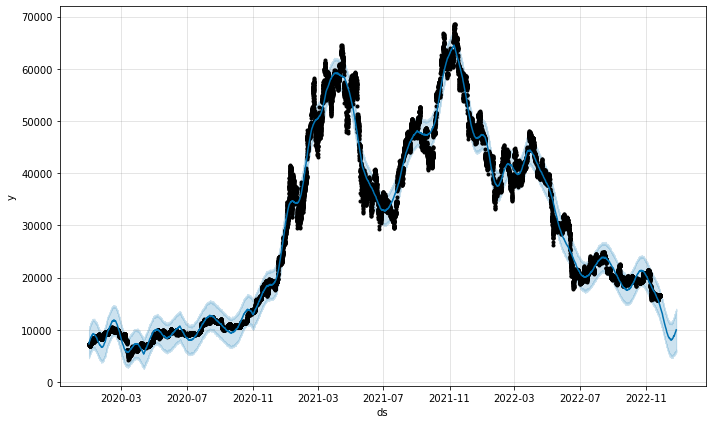

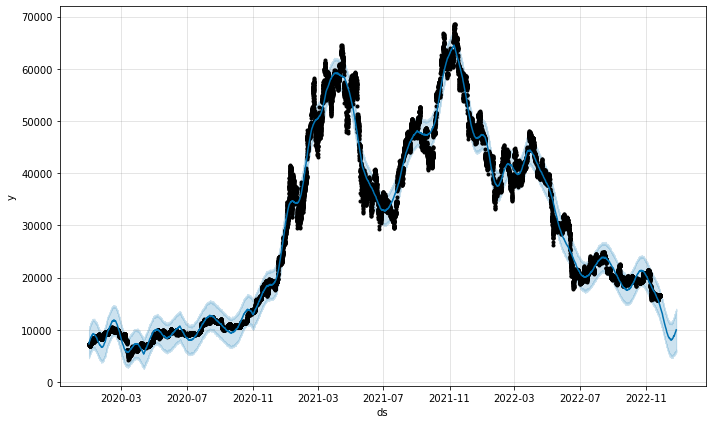

In [16]:
btcmodel_20.plot(btc_forecast_20)

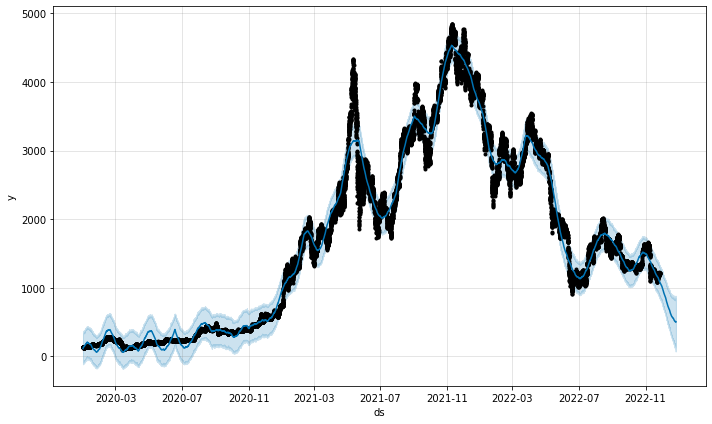

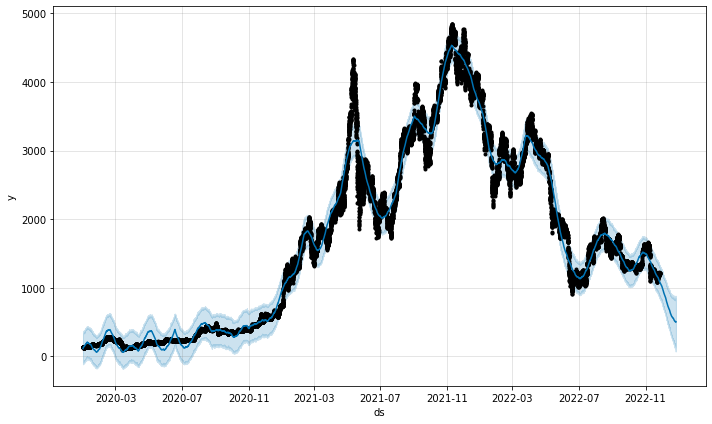

In [18]:
ethmodel_20.plot(eth_forecast_20)

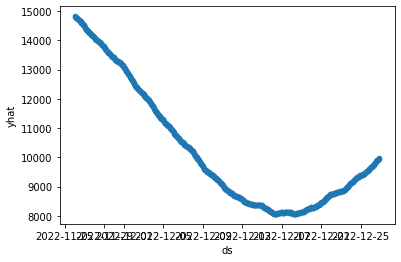

In [19]:
# Next month prediction for BTCUSD
btc_forecast_20[btc_forecast_20.ds > today].plot(x='ds', y='yhat', kind='scatter')

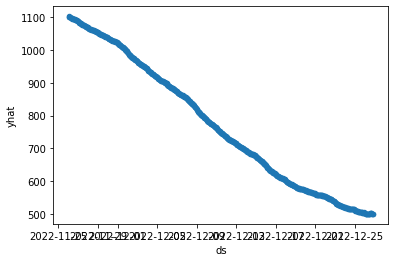

In [20]:
eth_forecast_20[eth_forecast_20.ds > today].plot(x='ds', y='yhat', kind='scatter')

As a result we can see that the prediction depends on a period of time that we use for fitting Prophet model. So if we let the model see the period before 2020 it tends to be less optimistic about the future prices. 
I would recommend to take the average between two predictions.
So BTCUSD would reach as low as 9000 by the end of the year 2022.
And ETHUSD - 400 
So the recommendation is to sell both currencies.